
# Automating Access to Cell Images and Other Data

Practicing open science implies that data should be made easily available and facile to re-use; accessible data is furthermore necessary for reproducible research. Replicating complex analysis environments has been made far easier with the [rise of containers](https://hub.docker.com/r/jupyter/datascience-notebook/). Methods for dealing with similarly complex data are only now emerging, but are poised to enable the distribution and versioning(!) of data sets.

The [Allen Institute for Cell Science](http://allencell.org) wants our data to be more accessible to a variety of users: queryable, easier to download, easier to load into your development environment, and easier to separate into subsets. One way we're doing that is by beginning to release our image sets via [Quilt](https://blog.quiltdata.com/data-packages-for-fast-reproducible-python-analysis-c74b78015c7f). This provides a `wget`-free mechanism, either from the command line or within Jupyter notebooks, to download and access images of individual cells, cell colonies, and associated metadata.

Of significant interest to external users is the association of versionable metadata with image data. This allows both the association of an image's context with the image and also the updating of derived calculations that provide summary statistical information about their associated images.

Here we'll explore the mechanisms for downloading and accessing our data through this system, but a systematic list of package contents is available on our [Quilt package pages](https://quiltdata.com/package/aics/). 

Let's go into more detail on what this work will provide and why we're supporting the analysis stack we've chosen:

### Jupyter Notebooks let us:
* Combine code and styled text so that we can develop models, take notes, and explain our work, as we go, in the same document.
* Share and view the same document in varied mediums, from development environments to web pages (such as this one).

### This project provides a data sharing mechanism that:
* Allows easy downloads.
* Allows versioning of datasets.
* Provides automatic de-duplication of files between datasets.
* Works well within the standard Python data science Jupyter stack.

### Choosing Quilt
Using Quilt, we can do all of the above. Let's explore the capabilities we've introduced by looking at our Tight Junction Protein, ZO1 (AICS-23) cell line. Further documentation of what this dataset contains and how it is structured is available on its [front page](https://quiltdata.com/package/aics/aics_23/), but this example will function as a quickstart guide.

## Let's Get Started

First, let's download our tight junction protein, ZO1 cell line package.

In [1]:
# import quilt and install the desired package
import quilt

# all packages will be under the 'aics' namespace
quilt.install('aics/aics_23')

aics/aics_23 already installed.
Overwrite? (y/n) y


 14%|█▎        | 16.9G/124G [00:00<00:00, 168GB/s]

100%|██████████| 124G/124G [00:00<00:00, 204GB/s] 


#### That's it?

Yep, that is all there is to getting our most up-to-date data for AICS-23: simple, fast, easy. We are supporting two main package divisions: each of our cell lines will have their own quilt data packages (`aics/aics_11`, `aics/aics_16`, etc) and `aics/cell_lines` will contain all our released data. For toy explorations, `aics/random_sample` will have a small set of randomly sampled images, distributed across all of our cell lines.

#### That looks suspiciously fast.

In this case, my system was downloading an update to bring my local set to the latest version. The benefit is that we will only send you data that has changed or been added to a dataset. Small updates are painless and data shared between package isn't duplicated.

#### What do the packages contain?

Great question! Let's take a look inside the package and find out. This is the interactive version of the documentation that exists on the [package homepage](https://quiltdata.com/package/aics/aics_23).

In [2]:
# import the dataset we just downloaded
from quilt.data.aics import aics_23 as junctions

# show
print(junctions)

<PackageNode '/home/jovyan/data_packages/quilt_packages/pkgs/Quilt/aics/aics_23'>
cell_segs/
fovs/
lines/
nuclei_segs/
plates/
structure_segs/
wells/
README
SCHEMA


These are all of the objects in the base level of the package. We have set things up in a directory style: anything with a `/` after it is a directory and anything else is a file. This package has directories for cell_segs (cell segmentations), fovs (field of view images), lines (cell line information), nuclei_segs (nuclei segmentations), plates (plate information), structure_segs (protein structure segmentations), and wells (well images and information).

It also has `README` and `SCHEMA` documents, which describe the package contents. `README` is the exact same document you see on the [Quilt documentation page for the package](https://quiltdata.com/package/aics/aics_23), while `SCHEMA` is a JSON file that documents where metadata lives.

#### How can I open the SCHEMA to actually view that information if it is a document?

Let's do that.

In [3]:
# open the json document
import json
schema = json.load(open(junctions.SCHEMA()))

# base schema keys
from pprint import pprint
pprint(list(schema.keys()))

['unique_structure_segmentation_info',
 'unique_plate_info',
 'unique_cell_segmentation_info',
 'unique_fov_info',
 'unique_line_info',
 'unique_nuclei_segmentation_info',
 'unique_well_info']


#### So there are multiple basic info files?

These packages contain a lot of data. It was necessary to devise a method to document the entirety of the contents, but just as an example, let's view a smaller portion of the schema. For example, perhaps we are only interested in what is in a unique line's metadata.

In [4]:
# each base schema key has their own documentation
# a unique_line_info json file has the following attributes
pprint(list(schema['unique_line_info'].keys()))

['cell_segmentations',
 'nuclei_segmentations',
 'wells',
 'line_id',
 'edits',
 'fovs',
 'structure_segmentations',
 'plates',
 'line']


#### Ahhh, much better. What does all this mean?

If you notice, there are attributes for all the other types of metadata files, `plates`, `wells`, `fovs`, `cell_segs`, `nuclei_segs`, and `structure_segs`. All packages will be set up this way, and all metadata info files will have this same behavior. The information contained in those attributes is the corresponding data of that type that relates to the current metadata information.

As an example, we are currently looking at cell line 23, if we open up cell line 23's metadata file, we will find a list of fov images that contain cell line 23. -- A code example of this next!

The other attributes are specific to the metadata you are looking at. In this case, that is `edits`, `line`, and `line_id`.

#### Will schema always be in this format?

Generally, this schema format won't change unless new data or features become available and we want to add more data to a dataset. But you can always double check by parsing the `SCHEMA` document or reading the documentation page for the package as the `SCHEMA` auto populates there as well.

#### What is in the attributes for each base key?

Let's take a quick look at one of the schema defined attributes for a `unique_line_info`.

In [5]:
pprint(schema['unique_line_info']['line'])

{'description': 'human readable edited cell line present',
 'example_value': 'AICS-10',
 'origin': 'meta/cell_info/line',
 'value_types': ["<type 'str'>"]}


#### Why does it say AICS-10?

This is the schema definition document. This is an example document of how metadata may look like for a given metadata JSON file.

#### What do these attributes mean?

All the attributes here are meant to help you understand what the information is and where it lives in the package. If we look at the edits attribute for `line` we can see that it has `description`, `example_value`, `origin`, and `value_types` attributes. These will always exist for every attribute in a `unique_TYPE_info` and explain various details about what the data will look like in the actual metadata.

`description` is a human written description of what this value encodes. There may be one `example_value` or multiple `example_value`s that show how the metadata may look like when retrieved. `origin` shows the path of how we retrieve this metadata. If `baseline` is used, that means that the attribute is encoded as a baseline standard and is generated by our package builder. Lastly, `value_types` is a list of possible types of values you can expect this attribute to be.

#### How about that code example for this package, to get a better understanding of everything?

Let's load the AICS 23 cell line (the tight junctions line we are using from above) metadata info document and parse the information.

In [6]:
# view all lines
print(junctions.lines)

<GroupNode>
line_AICS_23/



In [7]:
# open up the line of the package
print(junctions.lines.line_AICS_23)

<GroupNode>
info/



In [8]:
# great! we found the info document
print(junctions.lines.line_AICS_23.info)

<GroupNode>
load


#### Why didn't that work?

In order to properly version metadata separately from the images themselves we had to route the metadata and image data uniquely. So besides from the main `README` and `SCHEMA` documents, all files will be accessible by using a `load()` call.

In [9]:
# okay load the tight junctions line metadata please
print(junctions.lines.line_AICS_23.info.load)

<DataNode>


In [10]:
# hit a datanode, call it as a function
print(junctions.lines.line_AICS_23.info.load())

/home/jovyan/data_packages/quilt_packages/objs/9f8990c71027e285becc604327541537bd87098d8144f099230c4c3b7b18142c


#### I can tell it is a file path, but it has no file extension, what do I do?

Great question. All images we release are in OME-TIFF format, and all metadata info documents we release are in JSON format. So use your favorite TIFF Python reader and use the standard JSON Python reader to open them!

In [11]:
# open and display keys
junctions_info = json.load(open(junctions.lines.line_AICS_23.info.load()))
pprint(list(junctions_info.keys()))

['line',
 'edits',
 'line_id',
 'plates',
 'wells',
 'fovs',
 'cell_segs',
 'nuclei_segs',
 'structure_segs']


In [12]:
# let's make sure the metadata for this line matches what we claim it to be
# aics-23
print(junctions_info['line'])

AICS-23


#### Why are there keys for the other data types?

All metadata files will have a list of files related to the object you are currently viewing. If you are looking at the metadata for AICS-23, like we are now, the metadata info file will have lists for `plates`, `wells`, `fovs`, `cell_segs`, `nuclei_segs`, and `structure_segs` that then each contain a list of nodes that have AICS-23 data in them. Let's take a smaller look at just the plates with AICS-23 data.

In [13]:
pprint(junctions_info['plates'])

['plate_3500001327',
 'plate_3500001354',
 'plate_3500001380',
 'plate_3500001360',
 'plate_3500001359',
 'plate_3500001358',
 'plate_3500001328',
 'plate_3500001410',
 'plate_3500001409',
 'plate_3500001464',
 'plate_3500001411']


#### What does this mean?

This is a list of plates that were used to culture and image cells from the tight junctions (AICS-23) cell line in them. You can use these to route to view information about that specific plate.

In [14]:
# let's do that
print(junctions.plates.plate_3500001327)

<GroupNode>
info/



#### Oh! So, any attributes that correspond to another file type will work like this?

Yes. All metadata JSON files will have these lists of related files that you can use to navigate around quickly.

As an example, let's say you were looking at the segmentation of a specific nucleus in a specific cell. You could then open up that nucleus segmentation's info metadata document, and find the plate's attribute, in order to navigate back to that plate's metadata, for more information about said plate, including cells neighboring the one you were looking at.

#### What about the other attributes in the line metadata?

Let's get back to that now.

In [15]:
# three unique line metadata attributes
pprint(junctions_info['edits'])
pprint(junctions_info['line'])
pprint(junctions_info['line_id'])

[{'cas9': 'spCas9',
  'cas9_batch': '2015_Batch1',
  'cas9_batch_id': 1,
  'cas9_id': 1,
  'cr_rna': 'TJP1_crRNA-3',
  'cr_rna_batch': 'TJP1_crRNA-3-B1',
  'cr_rna_batch_id': 46,
  'cr_rna_id': 48,
  'donor_plasmid': 'TJP1-mEGFP',
  'donor_plasmid_batch': 'TJP1-mEGFP-1kb',
  'donor_plasmid_batch_id': 25,
  'donor_plasmid_id': 23,
  'fluorescent_protein': 'mEGFP',
  'fluorescent_protein_id': 2,
  'gene': 'TJP1',
  'gene_id': 19,
  'tag_location': 'N-terminus',
  'tag_location_id': 2}]
'AICS-23'
27


These are the other metadata attributes available for cell lines. And just as the `SCHEMA` document showed, the `edits` is a `list` of `dict` objects that contain information about which edits were made to the cell line. The `line` attribute is a string that has the production name for the cell line. And the `line_id` attribute has the line index.

#### Okay, so that's the metadata, what about the images?

On it!

In [16]:
# let's load a single image
# ._group_keys() gives us a list of group node names
# [0] gives us the first item in the list
print(junctions.fovs._group_keys()[0])

fov_00dde0c979ef45949337220524ccfec5


In [17]:
# peek inside the first fov node
print(junctions.fovs.fov_00dde0c979ef45949337220524ccfec5)

<GroupNode>
image/
info/



#### It has an image and an info directory?
Yes, the `info` will always be a metadata JSON file about that current node. In this case, it will be a metadata file about field of view image `00dde0c979ef45949337220524ccfec5`.

Again, both of these are directories because we can version them better when these are their own subdirectories of the object, so we'll do the same `.load()` step as we did with the `info` before:

In [18]:
# still a file path
print(junctions.fovs.fov_00dde0c979ef45949337220524ccfec5.image.load())

/home/jovyan/data_packages/quilt_packages/objs/28ba02e220594bd8e783f44ebe5e97d566a345d4977a512c836b87f712d6340c


In [19]:
# get the image data to display
import tifffile as tfle
img_data = tfle.imread(junctions.fovs.fov_00dde0c979ef45949337220524ccfec5.image.load())
print(img_data.shape)

(70, 7, 624, 924)


#### That is an odd shape...

All of our image data is actually five dimensional (!) and always in the order, `TIME - Z - CHANNEL - Y - X`. In short, these are 3D images with time labeling, and structures (cell membrane, nucleus, other subcellular structures) are put into their own channels. Thinking in standard 2D XY space, this corresponds to a 2D plane that shows the XY data at a given height in the z slice, at a given time, for a specific channel.

#### You said five dimensional, but the above image is four dimensional...

Correct, any image that is four dimensional is a single time point so you can think of it as `(1, 65, 7, 624, 924)`, but the python object that handles the data manages that single time point for you and ignores it.

#### How can I display the image?

Sorry, on it!

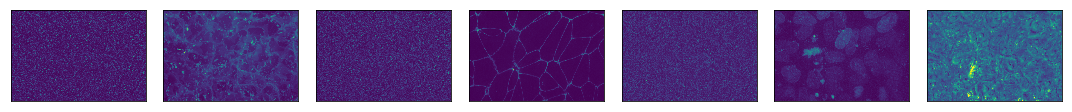

In [20]:
# import plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# import numpy
import numpy as np

# display each channel in a single row
fig, axes = plt.subplots(1, img_data.shape[1], figsize=(15, 10))
axes = axes.flatten()

# for each subplot, plot a channel
for i, ax in enumerate(axes):
    # collect all the z-slices for a single channel
    z_stack = img_data[:,i,:,:]
    # find the max of the z-slices
    max_project = np.max(z_stack, 0)
    # show the image
    ax.imshow(max_project)
    # remove any labels
    ax.set(xticks=[], yticks=[])
    
# just a viewing nicety
plt.tight_layout()

Look at those beautiful cells!

#### How can I label the channels with what they actually are?

This is where the metadata file comes in very handy!

In [21]:
# load the metadata
img_meta = json.load(open(junctions.fovs.fov_00dde0c979ef45949337220524ccfec5.info.load()))
pprint(img_meta, depth=2)

{'cell_segs': ['cell_plate_3500001464_well_E6_100X_20171024_5_Scene_5_P27_E06'],
 'cell_viability': 98.8,
 'cellbatch': None,
 'channels': [{...}, {...}, {...}, {...}, {...}, {...}, {...}],
 'clone': '20',
 'coating_type': 'Matrigel',
 'colony_ids': [],
 'concentration': 3000.0,
 'content_type': '100X_zstack',
 'image_ids': [87262],
 'instrument': 'ZSD2',
 'lines': ['line_AICS_23'],
 'location': None,
 'nuclei_segs': ['nuc_plate_3500001464_well_E6_100X_20171024_5_Scene_5_P27_E06'],
 'parent_plate_id': '2500001158',
 'passage': 36,
 'plate_barcode': '3500001464',
 'plate_id': None,
 'plate_type': '10cm',
 'plates': ['plate_3500001464'],
 'population_id': 3400,
 'seed_date': '10/16/2017',
 'seeding_density': 400000.0,
 'source_plate_id': '2500001221',
 'structure_segs': ['struct_plate_3500001464_well_E6_100X_20171024_5_Scene_5_P27_E06'],
 'well_name': 'E6',
 'well_type': 'exp',
 'wells': ['plate_3500001464_well_E6']}


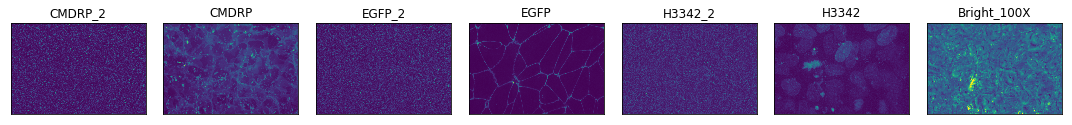

In [22]:
# there is a channels attribute for every field of view image, so let's use that data to label them
channel_names = [channel['dye_name'] for channel in img_meta['channels']]

# display each channel in a single row
fig, axes = plt.subplots(1, img_data.shape[1], figsize=(15, 10))
axes = axes.flatten()

# for each subplot, plot a channel
for i, ax in enumerate(axes):
    # collect all the z-slices for a single channel
    z_stack = img_data[:,i,:,:]
    # find the max of the z-slices
    max_project = np.max(z_stack, 0)
    # show the image
    ax.imshow(max_project)
    # remove any tick marks
    ax.set(xticks=[], yticks=[])
    # add the label
    ax.set_title(channel_names[i])
    
# just a viewing nicety
plt.tight_layout()

#### Why do some of the channel names have an `_2` attached to them?

Sorry about that. It's an artifact of the imaging process. But we can remove those channels if you want!

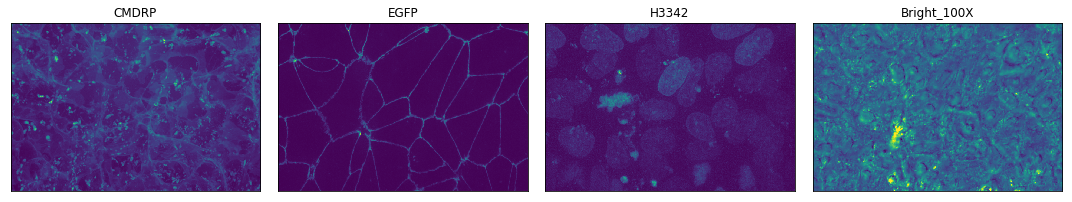

In [23]:
# select the indices which are marked as usable data
use_indices = [i for i, channel in enumerate(img_meta['channels']) if channel['use']]
# find the names for the channels that have use indices
channel_names = [channel['dye_name'] for channel in img_meta['channels'] if channel['use']]

# display each channel in a single row
# because we are dumping some of the data we should probably update the number of images we are going to show
fig, axes = plt.subplots(1, len(use_indices), figsize=(15, 10))
axes = axes.flatten()

# for each subplot, plot a channel
for i, ax in enumerate(axes):
    # collect all the z-slices for a single channel
    # find the correct channel index to use by using the current plotting index in the use_indices list
    z_stack = img_data[:,use_indices[i],:,:]
    # find the max of the z-slices
    max_project = np.max(z_stack, 0)
    # show the image
    ax.imshow(max_project)
    # remove any tick marks
    ax.set(xticks=[], yticks=[])
    # add the label
    ax.set_title(channel_names[i])
    
# just a viewing nicety
plt.tight_layout()

Ahhhh, much better! Metadata working in combination with image data, what a joy!

#### Can we get the segmentations for this field of view?

You bet. We'll collect the three segmentations from the loaded metadata. Remember: these are lists of related files: even though there is one object in them, they are still a list. So let's only grab the first object from each: 

In [24]:
cell_seg   = img_meta['cell_segs'][0]
nuc_seg    = img_meta['nuclei_segs'][0]
struct_seg = img_meta['structure_segs'][0]

In [25]:
# getattr makes it easy to find nodes using variables
cell_seg_node = getattr(junctions.cell_segs, cell_seg)
nuc_seg_node = getattr(junctions.nuclei_segs, nuc_seg)
struct_seg_node = getattr(junctions.structure_segs, struct_seg)
print(cell_seg_node, nuc_seg_node, struct_seg_node)

<GroupNode>
image/
info/
 <GroupNode>
image/
info/
 <GroupNode>
image/
info/



Load all the images into memory:

In [26]:
cell_seg_img = tfle.imread(cell_seg_node.image.load())
nuc_seg_img = tfle.imread(nuc_seg_node.image.load())
struct_seg_img = tfle.imread(struct_seg_node.image.load())
print('Images have shapes:', cell_seg_img.shape, nuc_seg_img.shape, struct_seg_img.shape)

Images have shapes: (70, 624, 924) (70, 624, 924) (70, 624, 924)


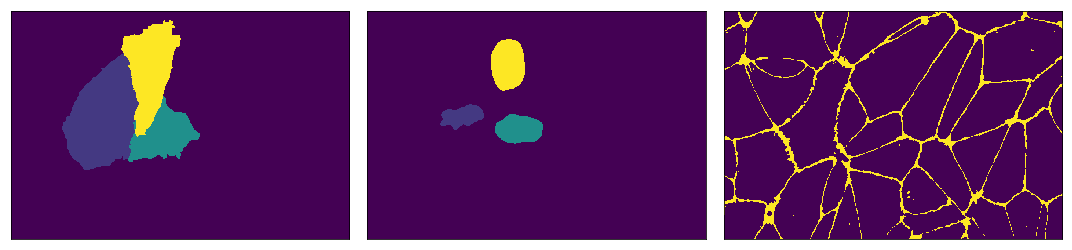

In [27]:
# display them all
segs = [cell_seg_img, nuc_seg_img, struct_seg_img]

# create subplots for however many segmentations we have (3)
fig, axes = plt.subplots(1, len(segs), figsize=(15, 10))
axes = axes.flatten()

# for each subplot, plot a segmentation
for i, ax in enumerate(axes):
    # find the max of the z-slices
    max_project = np.max(segs[i], 0)
    # show the image
    ax.imshow(max_project)
    # remove any tick marks
    ax.set(xticks=[], yticks=[])
    
# just a viewing nicety
plt.tight_layout()

#### What about combining the original field of view image channels together?

Yep, we can do that -- but it gets a little tricky. We need to write a custom RGB mapping function...

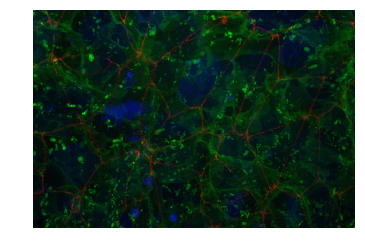

In [28]:
def normalize_im(img):
    im_min = np.min(img)
    im_max = np.max(img)
    
    img -= im_min
    img = img / (im_max - im_min)
        
    img[img<0] = 0
    img[img>1] = 1
    
    img *= 255
    
    return img.astype(int)

# channels to rgb function
# takes three xy images and find the normal inverse of them all and returns them in a stack
def channels_to_rgb(c1, c2, c3):
    r = normalize_im(c1)
    g = normalize_im(c2)
    b = normalize_im(c3)
    return np.stack((r,g,b), -1)

# combine all nuc membrane and protein channels
r = np.max(img_data[:, use_indices[1], :, :], 0)
g = np.max(img_data[:, use_indices[0], :, :], 0)
b = np.max(img_data[:, use_indices[2], :, :], 0)

# show the combined rgb image
plt.axis('off')
plt.imshow(channels_to_rgb(r, g, b));

## Wrapping Up

Using Quilt as the basis for our analysis stack, we can easily version, deploy, and natively install and download our datasets straight into Python and Jupyter Notebooks (with other language support coming soon)!

We believe this will enable easier, and faster development, from anyone who wants to use our data.